# Analysing Twitter Data

## Fetch already collected Twitter data 
In order to do any kind of analysis, we should have large amount of data. So, we would use the dataset of tweets collected using #WorldCup and can be downloaded [here](https://drive.google.com/file/d/1ToDR9EPz-DgkeGAMj3B5bP8XxlVGLovF/view?usp=sharing).
Once downloaded, move the JSON file to a folder named `resource` in the root of the project.

The dataset contains a text file containing the Twitter API responses. The structure of the tweet is same as we've seen before.

### How do I fetch this data?

+ Import the libraries and read the file
+ Convert the tweet string to Python dictionary

In [1]:
import json
from pprint import pprint

filename = 'resources/worldcup-tweets.json'

# Open the file in read mode
with open(filename, 'r') as f:
    tweet_string_list = f.readlines()
    
# Convert Tweets from string to dict
tweet_list = []
for string in tweet_string_list:
    tweet_list.append(json.loads(string))

### How many tweets are these?

In [2]:
print(len(tweet_list))

23638


## Analysis 1: How many hashtags are contained in the tweets?

### Calculating number of hashtags in a tweet
From the structure of the tweet, we can see that we get this information inside the 'entities' list. All we need is the length of the 'hashtags' list.
We define a method to do that.

In [3]:
from collections import Counter, OrderedDict

def get_num_of_hashtags(tweet_list):
    '''
    Returns the counter of number of tweets by 
    the number of hashtags used
    '''
    tweet_hashtags = Counter()
    for tweet in tweet_list:
        tweet_hashtags[len(tweet['entities']['hashtags'])] += 1
    return tweet_hashtags

### Plot the counts in form a Bar Chart

The following method contains the code to plot a bar chart, given labels and their counts.

In [4]:
import numpy as np
import matplotlib.pyplot as plt

%matplotlib notebook

def plot_bar_chart(labels, counts):
    '''
    Takes labels and counts and returns a bar chart
    :param labels: list of label strings
    :param labels: list of integer counts
    '''
    index = np.arange(len(labels))
    plt.bar(index, counts)
    plt.xlabel('Number of Hashtags per tweet')
    plt.ylabel('Number of Tweets')
    plt.xticks(index, labels)
    plt.title('Tweet counts by number of hashtags')
    plt.show()

### Show me the tweet counts for number of hashtags

In [5]:
hashtags_counter = get_num_of_hashtags(tweet_list)
pprint(hashtags_counter)

Counter({1: 8853,
         2: 4601,
         0: 4051,
         3: 2744,
         4: 1603,
         5: 636,
         6: 417,
         7: 249,
         9: 198,
         8: 159,
         10: 61,
         11: 35,
         13: 10,
         12: 9,
         14: 6,
         15: 4,
         17: 1,
         25: 1})


### But this is not pretty

Now that we have the counts, we supply these numbers to the plotting method and we get nice looking plot.

In [6]:
counter_dict = OrderedDict(hashtags_counter.most_common())
pprint(counter_dict)

OrderedDict([(1, 8853),
             (2, 4601),
             (0, 4051),
             (3, 2744),
             (4, 1603),
             (5, 636),
             (6, 417),
             (7, 249),
             (9, 198),
             (8, 159),
             (10, 61),
             (11, 35),
             (13, 10),
             (12, 9),
             (14, 6),
             (15, 4),
             (17, 1),
             (25, 1)])


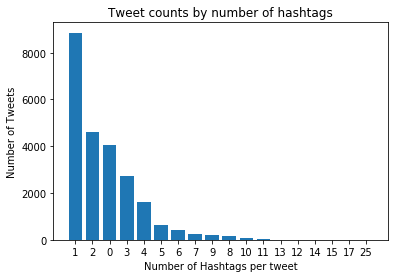

In [7]:
# Get labels and counts from the dictionary
labels = list(counter_dict.keys())
counts = list(counter_dict.values())

plot_bar_chart(labels, counts)

## Analysis 2: Which devices were used to send these tweets?

### Calculating number of tweets for most common devices used
Again, we can find this information from our tweet data, and a 'source' field specifies this information. It looks something like this:

`<a href="http://twitter.com/download/android" rel="nofollow">Twitter for Android</a>`

Now, in order to get the text out of this HTML tag, we use regular expressions.
### Regex method

In [8]:
import re

def remove_html_tags(text):
    '''
    Remove html tags from a string
    '''
    clean = re.compile('<.*?>')
    return re.sub(clean, '', text)

### Count the tweet per device

Once we have cleaned the HTML tags, like the previous analysis, we will need to count how many tweets from which device.

In [9]:
def get_device_counts(tweet_list):
    '''
    Returns the 5 most common devices used to post a tweet
    '''
    tweet_device = Counter()
    for tweet in tweet_list:
        tweet_device[tweet['source']] += 1
    tweet_device = tweet_device.most_common(5)
    return tweet_device

### Plot a pie chart
We use a pie chart to show, how much percentage of the tweets were posted by which device.

In [10]:
def plot_pie_chart(labels, counts, explode=None):
    fig1, ax1 = plt.subplots()
    ax1.pie(counts, explode=explode, labels=labels, 
            autopct='%1.1f%%', startangle=90, shadow=True, 
            wedgeprops=dict(width=0.2))
    ax1.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.
    plt.title('Tweet percentage by the device source', y=1.05)
    plt.show()

### What do the numbers look like?

In [11]:
device_counter = get_device_counts(tweet_list)
pprint(device_counter)

[('<a href="http://twitter.com/download/android" rel="nofollow">Twitter for '
  'Android</a>',
  10036),
 ('<a href="http://twitter.com/download/iphone" rel="nofollow">Twitter for '
  'iPhone</a>',
  7146),
 ('<a href="http://twitter.com" rel="nofollow">Twitter Web Client</a>', 3137),
 ('<a href="https://mobile.twitter.com" rel="nofollow">Twitter Lite</a>', 809),
 ('<a href="https://about.twitter.com/products/tweetdeck" '
  'rel="nofollow">TweetDeck</a>',
  774)]


In [12]:
device_labels = []
device_counts = []

for tup in device_counter:
    device_labels.append(remove_html_tags(tup[0]))
    device_counts.append(tup[1])

print(device_labels, '\n', device_counts)

['Twitter for Android', 'Twitter for iPhone', 'Twitter Web Client', 'Twitter Lite', 'TweetDeck'] 
 [10036, 7146, 3137, 809, 774]


### But numbers are boring!
Show me the figure!

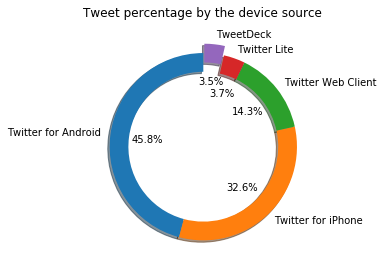

In [13]:
device_explode = [0 for label in device_labels]
device_explode[len(device_explode)-1] = 0.1

plot_pie_chart(device_labels, device_counts, device_explode)

## Analysis 3: Which words are used most often?

### Let's create a word cloud! 
A word cloud or tag cloud is a form of visual representation where the size of each word, depicts its frequency in the text.

In [14]:
from wordcloud import WordCloud, STOPWORDS
from PIL import Image
import numpy as np

def make_word_cloud(tweet_text, stopwords):        
    ball_mask = np.array(Image.open('resources/ball.jpg'))
    
    # Generate a word cloud image
    wordcloud = WordCloud(background_color="white", mask=ball_mask,
               stopwords=stopwords).generate(tweet_text)

    # Display the generated image:
    plt.imshow(wordcloud, interpolation='bilinear')
    plt.show()

To create a word cloud, we get all the text from our tweets, and remove the stop words. Stop words are most common words in English language and don't contribute to the topic relevant words. Stop words can be article (a, an, the) or pronouns (you, we, I).

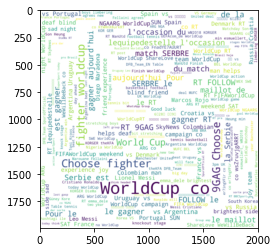

In [15]:
tweet_text = ''
for tweet in tweet_list:
    tweet_text += tweet['text']

stopwords = set(STOPWORDS)
stopwords.add('https')
stopwords.add('BCwn8xx039RT')

make_word_cloud(tweet_text, stopwords)

## References

+ https://developer.twitter.com/en/docs/tweets/search/api-reference/get-search-tweets.html
+ https://medium.com/python-pandemonium/data-visualization-in-python-bar-graph-in-matplotlib-f1738602e9c4
+ https://docs.python.org/2/library/collections.html
+ https://github.com/amueller/word_cloud/blob/master/examples/masked.py
+ https://medium.com/@jorlugaqui/how-to-strip-html-tags-from-a-string-in-python-7cb81a2bbf44
+ https://matplotlib.org/examples/pie_and_polar_charts/pie_demo_features.html

## FIN